In [2]:
# imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import plotly.graph_objs as go
import seaborn as sns


In [3]:
images_path = "data/flowers"

In [4]:
flowers_names = os.listdir(images_path)
os.listdir(images_path)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [5]:
flowers_images = []
for f in flowers_names:
    f_path = images_path + '/' + f
    flowers_images.append(len(os.listdir(f_path)))

In [6]:
fig = go.Figure()
fig.add_trace(go.Pie(labels = flowers_names, values = flowers_images, textinfo='label+percent', hoverinfo='label+value'))
fig.update_layout(title='Distribution Of Number Of Flowers Of Each Category')
fig.show()

In [7]:
dim_x = []
dim_y = []

for f in flowers_names:
    f_path =  images_path + '/' + f
    f_image_list = os.listdir(f_path)
    
    for i in f_image_list:
        x,y,z = imread(f_path + '/' + i).shape
        dim_x.append(x)
        dim_y.append(y)

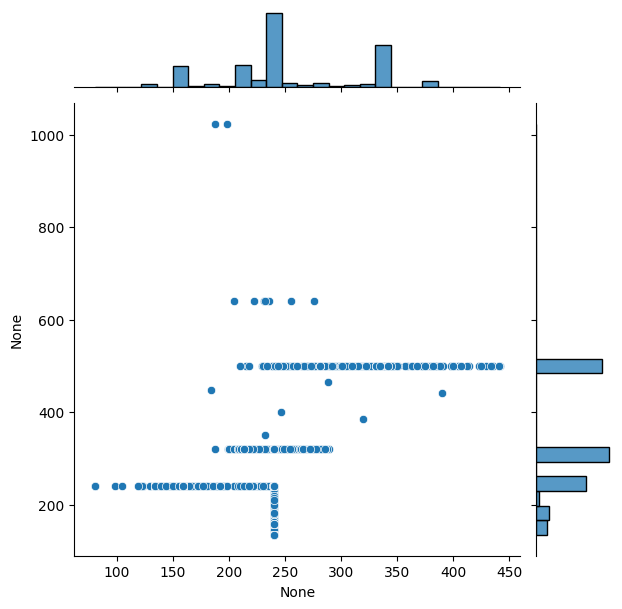

In [8]:
sns.jointplot(x=dim_x, y=dim_y)

In [9]:
print('Median Value For Dim X : ' + str(np.median(dim_x)))
print('Median Value For Dim Y : ' + str(np.median(dim_y)))

Median Value For Dim X : 240.0
Median Value For Dim Y : 320.0


In [10]:
# using split-folders to split the data into test, val and train
import splitfolders
splitfolders.ratio('Data/flowers', output="Data/flowers_split", seed=1337, ratio=(.7, 0.15,0.15)) 

In [11]:

from keras.preprocessing.image import ImageDataGenerator

image_shape = (240, 320, 3)
test_split_size = 0.15
batch_size = 128
rescale_factor = 1/255

# Define the parameters for data augmentation
train_datagen = ImageDataGenerator(
    rescale=rescale_factor,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create the training dataset
train_dataset = train_datagen.flow_from_directory(
    'data/flowers_split/train',
    target_size=image_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create the val dataset
val_dataset = validation_datagen.flow_from_directory(
    'data/flowers_split/val/',
    target_size=image_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create the test dataset
test_dataset = test_datagen.flow_from_directory(
    'data/flowers_split/test/',
    target_size=image_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


print(f'Number Of Images In Training Dataset : {str(train_dataset.samples)}')
print(f'Number Of Images In Validation Dataset : {str(val_dataset.samples)}')
print(f'Number Of Images In Validation Dataset : {str(test_dataset.samples)}')
print(f'Total number of images: {train_dataset.samples+val_dataset.samples+test_dataset.samples}')

Found 3019 images belonging to 5 classes.
Found 644 images belonging to 5 classes.
Found 654 images belonging to 5 classes.
Number Of Images In Training Dataset : 3019
Number Of Images In Validation Dataset : 644
Number Of Images In Validation Dataset : 654
Total number of images: 4317


In [12]:
train_dataset.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [13]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [14]:
# Defining Number Of Steps For Training & Validation Of Model
steps_per_epoch = train_dataset.samples // batch_size
validation_steps = val_dataset.samples // batch_size

print('Steps Per Epoch : Training -> ' + str(steps_per_epoch))
print('Steps : Validation -> ' + str(validation_steps))

Steps Per Epoch : Training -> 23
Steps : Validation -> 5


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Activation, BatchNormalization
from keras import regularizers
from keras.optimizers import Adam

In [16]:
model = Sequential()

model.add(
    Conv2D(
        filters=32,
        padding="same",
        kernel_size=(3, 3),
        input_shape=image_shape,
        kernel_regularizer=regularizers.L2(1e-4),
    )
)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(
    Conv2D(
        filters=32,
        padding="same",
        kernel_size=(3, 3),
        kernel_regularizer=regularizers.L2(1e-4),
    )
)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(
    Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        kernel_regularizer=regularizers.L2(1e-4),
    )
)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(
    Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        kernel_regularizer=regularizers.L2(1e-4),
    )
)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(
    Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        kernel_regularizer=regularizers.L2(1e-4),
    )
)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(
    Conv2D(
        filters=64,
        padding="same",
        kernel_size=(3, 3),
        kernel_regularizer=regularizers.L2(1e-4),
    )
)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation="softmax"))

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 320, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 240, 320, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 240, 320, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 320, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 240, 320, 32)      128       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 240, 320, 32)      0

In [18]:
history = model.fit(train_dataset,epochs=2,steps_per_epoch = steps_per_epoch,
                    validation_data = val_dataset, validation_steps=validation_steps,
                    verbose=True, callbacks=[early_stop])

Epoch 1/2


